In [1]:
import pandas as pd
s_df = pd.read_csv('students.csv')

In [2]:
len(s_df)

318

In [3]:
s_df.head()

,student_id,gender,leader_flag,support_flag,score
0,1,0,0,0,335
1,2,1,0,0,379
2,3,0,0,0,350
3,4,0,0,0,301
4,5,1,0,0,317


In [4]:
s_df['student_id']

0        1
1        2
2        3
3        4
4        5
      ... 
313    314
314    315
315    316
316    317
317    318
Name: student_id, Length: 318, dtype: int64

In [5]:
s_df['student_id'].max()

318

In [6]:
s_df['student_id'].min()

1

In [7]:
set(range(1,319)) == set(s_df['student_id'].tolist())

True

In [8]:
s_df['gender'].value_counts()

0    160
1    158
Name: gender, dtype: int64

In [9]:
s_df['score'].describe()

count    318.000000
mean     303.644654
std       65.179995
min       88.000000
25%      261.000000
50%      310.000000
75%      350.000000
max      485.000000
Name: score, dtype: float64

Fontconfig warning: ignoring UTF-8: not a valid region tag


<AxesSubplot:>

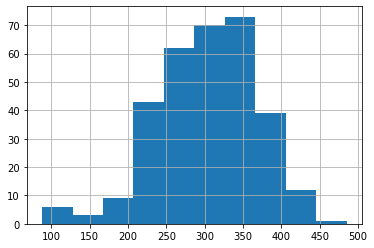

In [10]:
s_df['score'].hist()

In [11]:
s_df['support_flag'].value_counts()

0    314
1      4
Name: support_flag, dtype: int64

In [90]:
s_pair_df = pd.read_csv('student_pairs.csv')
print(len(s_pair_df))

3


In [13]:
s_pair_df.head()

,student_id1,student_id2
0,118,189
1,72,50
2,314,233


In [91]:
import pulp

In [92]:
prob = pulp.LpProblem('ClassAssignmentProblem', pulp.LpMaximize)

In [93]:
S = s_df['student_id'].tolist()
print(S)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [94]:
C = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [95]:
SC = [(s,c) for s in S for c in C]
print(SC[:30])

x = pulp.LpVariable.dicts('x', SC, cat='Binary')

[(1, 'A'), (1, 'B'), (1, 'C'), (1, 'D'), (1, 'E'), (1, 'F'), (1, 'G'), (1, 'H'), (2, 'A'), (2, 'B'), (2, 'C'), (2, 'D'), (2, 'E'), (2, 'F'), (2, 'G'), (2, 'H'), (3, 'A'), (3, 'B'), (3, 'C'), (3, 'D'), (3, 'E'), (3, 'F'), (3, 'G'), (3, 'H'), (4, 'A'), (4, 'B'), (4, 'C'), (4, 'D'), (4, 'E'), (4, 'F')]


In [96]:
for s in S:
  prob += pulp.lpSum([x[s,c] for c in C]) == 1

In [97]:
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S]) >= 39
  prob += pulp.lpSum([x[s,c] for s in S]) <= 40

In [98]:
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]

S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]

In [99]:
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S_male]) <= 20
  prob += pulp.lpSum([x[s,c] for s in S_female]) <= 20

In [100]:
score = {row.student_id:row.score for row in s_df.itertuples()}

score_mean = s_df['score'].mean()
print(score_mean)

for c in C:
  prob += pulp.lpSum([x[s,c] * score[s] for s in S]) >= (score_mean-10)*pulp.lpSum([x[s,c] for s in S])
  prob += pulp.lpSum([x[s,c] * score[s] for s in S]) <= (score_mean+10)*pulp.lpSum([x[s,c] for s in S])

303.6446540880503


In [101]:
S_leader = [row.student_id for row in s_df.itertuples() if row.leader_flag == 1]

for c in C:
  prob += pulp.lpSum([x[s,c] for s in S_leader]) >= 2

In [102]:
S_support = [row.student_id for row in s_df.itertuples() if row.support_flag == 1]

for c in C:
  prob += pulp.lpSum([x[s,c] for s in S_support]) <= 1

In [103]:
SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]

for s1, s2 in SS:
  for c in C:
    prob += x[s1,c] + x[s2,c] <= 1

In [104]:
status = prob.solve()
print(status)
print(pulp.LpStatus[status])

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --cpxlp /var/folders/f1/dg38sdvs7tsgxf3hbspgk1vc0000gn/T/5135557eadb24a748692f332d051eab8-pulp.lp
 -o /var/folders/f1/dg38sdvs7tsgxf3hbspgk1vc0000gn/T/5135557eadb24a748692f332d051eab8-pulp.sol
Reading problem data from '/var/folders/f1/dg38sdvs7tsgxf3hbspgk1vc0000gn/T/5135557eadb24a748692f332d051eab8-pulp.lp'...
406 rows, 2545 columns, 15480 non-zeros
2544 integer variables, all of which are binary
7332 lines were read
GLPK Integer Optimizer, v4.65
406 rows, 2545 columns, 15480 non-zeros
2544 integer variables, all of which are binary
Preprocessing...
406 rows, 2544 columns, 15480 non-zeros
2544 integer variables, all of which are binary
Scaling...
 A: min|aij| =  3.553e-01  max|aij| =  2.256e+02  ratio =  6.350e+02
GM: min|aij| =  1.528e-01  max|aij| =  6.545e+00  ratio =  4.283e+01
EQ: min|aij| =  2.335e-02  max|aij| =  1.000e+00  ratio =  4.283e+01
2N: min|aij| =  2.015e-02  max|aij| =  1.290e+00  ratio =

In [105]:
C2Ss = {}
for c in C:
  C2Ss[c] = [s for s in S if x[s,c].value()==1]

for c, Ss in C2Ss.items():
  print('Class:',c)
  print('Num:', len(Ss))
  print('Student:', Ss)
  print()

Class: A
Num: 39
Student: [9, 10, 25, 26, 34, 35, 47, 56, 73, 75, 98, 102, 103, 106, 108, 114, 118, 122, 123, 126, 139, 143, 156, 176, 199, 201, 216, 235, 248, 257, 270, 278, 280, 284, 288, 294, 297, 301, 314]

Class: B
Num: 40
Student: [4, 11, 17, 29, 44, 50, 89, 100, 110, 111, 117, 120, 127, 132, 135, 144, 147, 150, 157, 188, 189, 190, 212, 218, 230, 238, 239, 241, 245, 252, 262, 269, 271, 274, 281, 282, 287, 302, 306, 309]

Class: C
Num: 40
Student: [14, 31, 36, 37, 54, 58, 59, 61, 69, 72, 77, 78, 81, 86, 112, 119, 133, 142, 160, 161, 171, 186, 187, 192, 205, 209, 213, 217, 229, 236, 253, 256, 266, 273, 290, 295, 304, 310, 312, 318]

Class: D
Num: 40
Student: [2, 16, 21, 33, 38, 63, 68, 71, 85, 97, 109, 134, 140, 146, 158, 159, 168, 177, 180, 194, 198, 210, 220, 221, 225, 231, 240, 242, 246, 254, 268, 275, 277, 279, 283, 286, 292, 293, 311, 317]

Class: E
Num: 40
Student: [5, 6, 20, 22, 24, 28, 30, 32, 42, 53, 60, 70, 79, 92, 94, 105, 128, 129, 131, 154, 169, 173, 175, 178, 181, 182

In [116]:
for s in S:
  assingned_class = [x[s,c].value() for c in C if x[s,c].value()==1]

  if len(assingned_class) != 1:
    print('error:', s, assingned_class)

In [107]:
result_df = s_df.copy()

S2C = {s:c for s in S for c in C if x[s,c].value()==1}

result_df['assigned_class'] = result_df['student_id'].map(S2C)
result_df.head(5)

,student_id,gender,leader_flag,support_flag,score,assigned_class
0,1,0,0,0,335,G
1,2,1,0,0,379,D
2,3,0,0,0,350,F
3,4,0,0,0,301,B
4,5,1,0,0,317,E


In [108]:
result_df.groupby('assigned_class')['student_id'].count()

assigned_class
A    39
B    40
C    40
D    40
E    40
F    39
G    40
H    40
Name: student_id, dtype: int64

In [109]:
result_df.groupby(['assigned_class', 'gender'])['student_id'].count()

assigned_class  gender
A               0         20
                1         19
B               0         20
                1         20
C               0         20
                1         20
D               0         20
                1         20
E               0         20
                1         20
F               0         20
                1         19
G               0         20
                1         20
H               0         20
                1         20
Name: student_id, dtype: int64

In [110]:
result_df.groupby('assigned_class')['score'].mean()

assigned_class
A    312.333333
B    295.475000
C    293.650000
D    313.600000
E    312.950000
F    294.538462
G    312.550000
H    294.050000
Name: score, dtype: float64

In [111]:
result_df.groupby('assigned_class')['leader_flag'].sum()

assigned_class
A    2
B    2
C    2
D    2
E    2
F    2
G    3
H    2
Name: leader_flag, dtype: int64

In [112]:
result_df.groupby(['assigned_class'])['support_flag'].sum()

assigned_class
A    1
B    0
C    1
D    0
E    0
F    1
G    1
H    0
Name: support_flag, dtype: int64

In [113]:
for i, (s1, s2) in enumerate(SS):
  print('case:', i)
  c1 = S2C[s1]
  c2 = S2C[s2]
  print('s1:{}-{}'.format(s1,c1))
  print('s2:{}-{}'.format(s2,c2))
  print('')

case: 0
s1:118-A
s2:189-B

case: 1
s1:72-C
s2:50-B

case: 2
s1:314-A
s2:233-E



In [114]:
import matplotlib.pyplot as plt

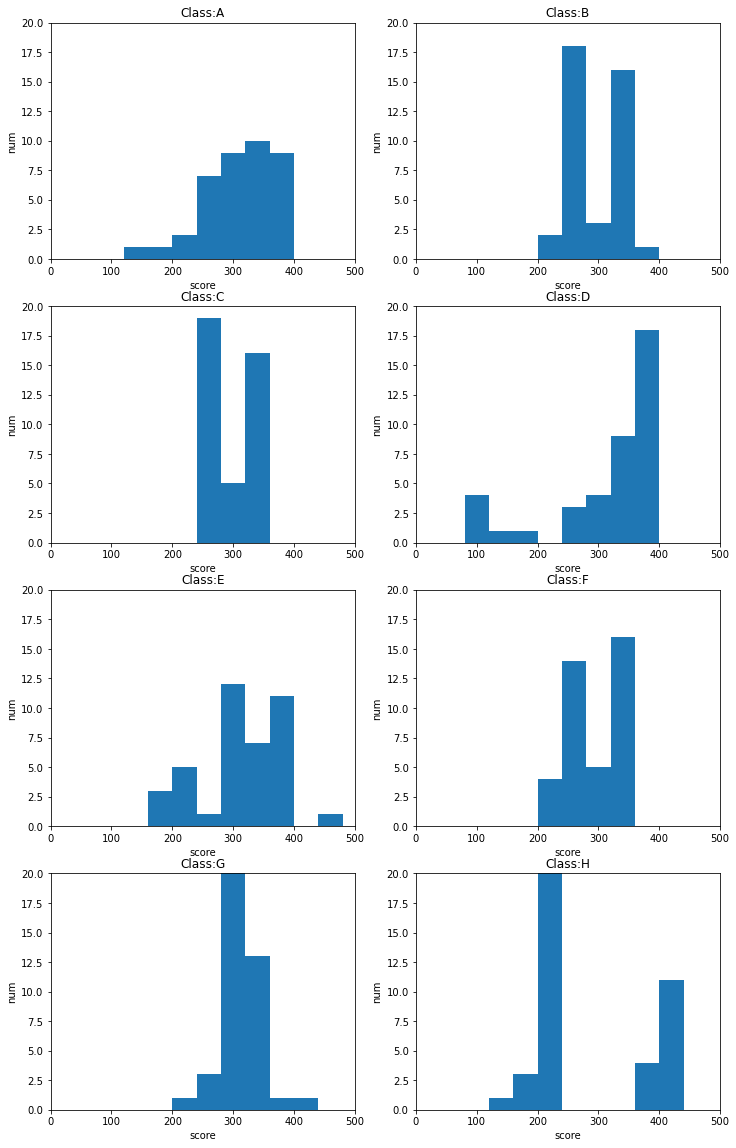

In [120]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
  cls_df = result_df[result_df['assigned_class']==c]
  ax = fig.add_subplot(4
                       , 2
                       , i+1
                       , xlabel='score'
                       , ylabel='num'
                       , xlim=(0, 500)
                       , ylim=(0, 20)
                       , title='Class:{:s}'.format(c)
                       )
  ax.hist(cls_df['score'], bins=range(0,500,40))

In [121]:
#初期クラス編成のデータを作成
#学力をもとに順位を付与
s_df['score_rank'] = s_df['score'].rank(ascending=False, method='first')

#学力順にクラス編成し、init_assigned_classカラムを作成
class_dic = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}
s_df['init_assigned_class'] = s_df['score_rank'].map(lambda x:x % 8).map(class_dic)
s_df.head()

,student_id,gender,leader_flag,support_flag,score,score_rank,init_assigned_class
0,1,0,0,0,335,109.0,F
1,2,1,0,0,379,38.0,G
2,3,0,0,0,350,79.0,H
3,4,0,0,0,301,172.0,E
4,5,1,0,0,317,147.0,D


In [122]:
#init_flagを作成
init_flag = {(s,c) : 0 for s in S for c in C}

for row in s_df.itertuples():
  init_flag[row.student_id, row.init_assigned_class] = 1

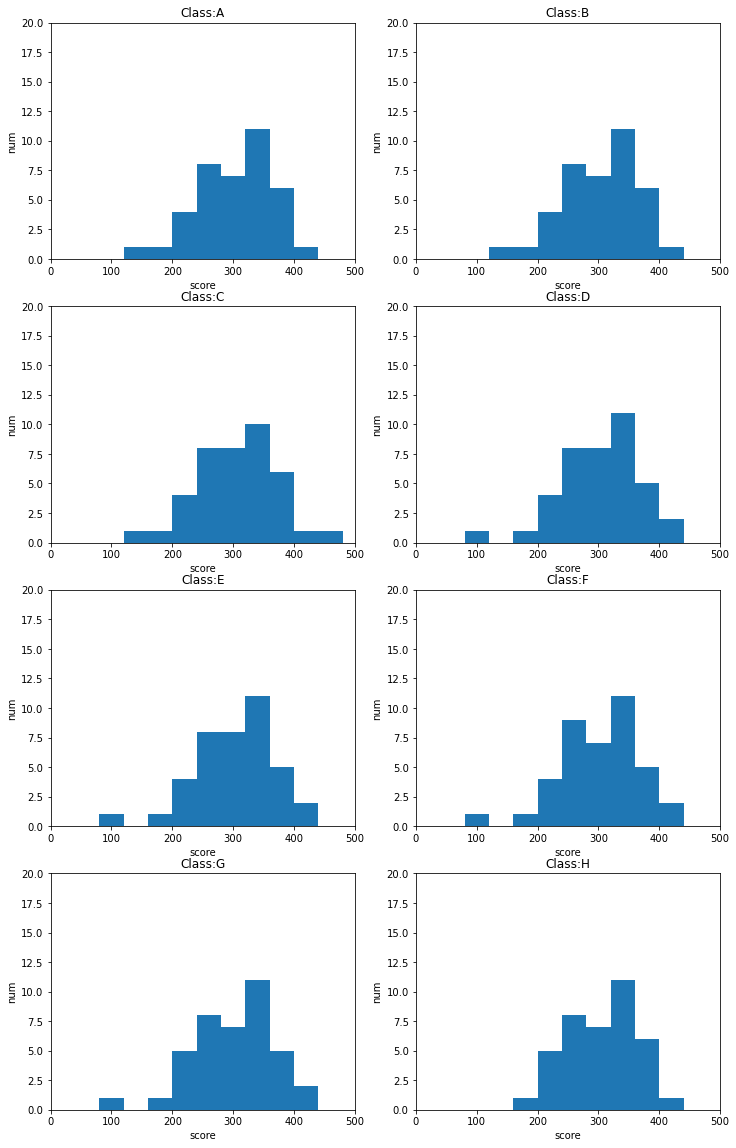

In [124]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
  cls_df = s_df[s_df['init_assigned_class']==c]
  ax = fig.add_subplot(4
                       , 2
                       , i+1
                       , xlabel='score'
                       , ylabel='num'
                       , xlim=(0, 500)
                       , ylim=(0, 20)
                       , title='Class:{:s}'.format(c)
                       )
  ax.hist(cls_df['score'], bins=range(0, 500, 40))